In [1]:
from collections import Counter

import pandas as pd
import regex as re
import numpy as np
from itertools import chain
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# I use NLP technique to try some data cleaning before,
# But the result doesn't improve. So now I'm reusing raw title
# with sklearn's default tokenizer

train_dataframe = pd.read_pickle('data/train-df-clean-v1.pickle')
test_dataframe = pd.read_pickle('data/test-df-clean-v1.pickle')

print(train_dataframe.shape, test_dataframe.shape)

(6027, 10) (3826, 9)


In [3]:
from sklearn.utils import shuffle
train_dataframe = shuffle(train_dataframe)
print(train_dataframe.iloc[0])
v_df = train_dataframe.iloc[:int(train_dataframe.shape[0] / 5.0), :]
pt_df = train_dataframe.iloc[int(train_dataframe.shape[0] / 5.0):, :]
print(pt_df.shape, v_df.shape)

print(pt_df.iloc[0])

pt_y = pt_df['category'].values
v_y = v_df['category'].values
#print(pt_y[: 10])

t_X = train_dataframe
t_y = t_X['category'].values

article_id                                                  316
title         Hertz (HTZ) Approves Spin of Equipment Rental ...
url           http://www.streetinsider.com/Hot+Corp.+News/He...
publisher                    StreetInsider.com \(subscription\)
hostname                                  www.streetinsider.com
timestamp                                               1.4e+12
category                                                      2
raw             [hertz, htz, approves, equipment, rental, unit]
norm            [hertz, htz, approves, equipment, rental, unit]
lemma           [hertz, htz, approves, equipment, rental, unit]
Name: 315, dtype: object
(4822, 10) (1205, 10)
article_id                                                 3885
title         Midday Market Stats: The Boeing Company Pressu...
url           http://www.schaeffersresearch.com/commentary/c...
publisher                          Schaeffers Research \(blog\)
hostname                             www.schaeffersresear

In [4]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 5))
pt_X = vectorizer.fit_transform(pt_df['title'].values)
print('done')
v_X = vectorizer.transform(v_df['title'].values)
print('done')
pt_X.toarray()
v_X.toarray()
print(v_X.shape)

t_X = vectorizer.transform(t_X['title'].values)
print(t_X.shape)

done
done
(1205, 56612)
(6027, 56612)


In [6]:
# cross validation

from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
scores = cross_val_score(clf, t_X, t_y, cv=5, scoring='f1_micro')
print(np.mean(scores))

0.6006083890609438


(4822, 56612) (4822,)
(1205, 56612) (1205,)
(1205,)
f2 score is:0.5818626828294929


/diskA/yisong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


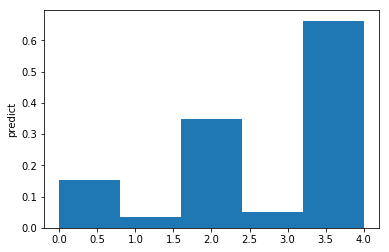

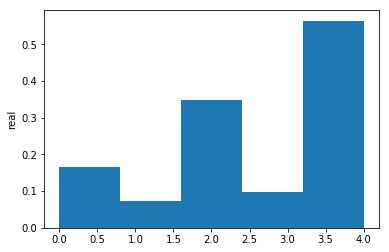

In [8]:
from sklearn.metrics import fbeta_score

print(pt_X.shape, pt_y.shape)
print(v_X.shape, v_y.shape)


clf = MultinomialNB()
clf.fit(pt_X, pt_y)

result = clf.predict(v_X)
print(result.shape)

print('f2 score is:{}'.format(fbeta_score(v_y, result, average='macro', beta=2)))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(result, normed=True, bins=5)
plt.ylabel('predict')
plt.show()

plt.hist(pt_y, normed=True, bins=5)
plt.ylabel('real')
plt.show()

/diskA/yisong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


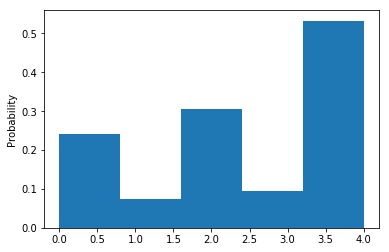

In [9]:
test_X = vectorizer.transform(test_dataframe['title'].values)
test_X.toarray()
result = clf.predict(test_X)

write_file = open('result-11-04-v4.txt', 'w+')
write_file.write('article_id,category\n')
i = 1
for item in result:
    write_file.write('{},{}\n'.format(i, item))
    i += 1
write_file.close()

plt.hist(result, normed=True, bins=5)
plt.ylabel('Probability')
plt.show()